In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('kidney_disease.csv')

In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


ckd=chronic kidney disease

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
data.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [6]:
data.classification=data.classification.replace("ckd\t","ckd")

In [7]:
data.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [8]:
data.drop('id', axis = 1, inplace = True)

In [9]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [10]:
data['classification'] = data['classification'].replace(['ckd','notckd'], [1,0])

<ipython-input-10-e475ae5dc067>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['classification'] = data['classification'].replace(['ckd','notckd'], [1,0])


In [11]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,1


In [12]:
data.isnull().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4
bgr,44


In [13]:
df = data.dropna(axis = 0)
print(f"Before dropping all NaN values: {data.shape}")
print(f"After dropping all NaN values: {df.shape}")

Before dropping all NaN values: (400, 25)
After dropping all NaN values: (158, 25)


In [14]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [15]:
df.index = range(0,len(df),1)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [16]:
for i in df['wc']:
    print(i)

6700
12100
4500
11000
9200
6900
9600
18900
7200
14600
6400
	6200
3800
9800
12500
5600
7000
15200
5000
16300
	8400
10500
15200
14600
7900
10900
12800
12400
19100
7500
16700
9600
26400
9800
8800
7400
12000
7500
15700
11500
5000
10200
5400
10400
9800
9100
6200
8300
9200
10700
9100
8400
4300
9400
5600
7200
8600
5000
10500
6800
9500
6900
7200
9000
5600
4700
6300
9400
5800
9100
5500
6700
5300
9800
7100
7000
10200
6300
8600
11000
7200
6200
9100
4300
7900
6900
11000
7500
8200
9400
8100
7000
10400
9600
7800
6700
8300
10700
7800
6700
4300
10700
7500
4700
7000
6700
7300
7700
5500
8100
7900
7200
7300
9900
7000
5800
6800
6300
7400
11000
5200
6000
5800
5400
10300
9300
10500
6700
9400
10300
9300
6500
10500
9200
8000
9700
9100
6400
5400
6500
6000
5100
11000
8000
5700
6200
9500
7200
6300
5800
6600
7400
9500
6700
7800
6600
7200
6800


In [17]:
df['wc']=df['wc'].replace(["\t6200","\t8400"],[6200,8400])

<ipython-input-17-42d51bba1371>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wc']=df['wc'].replace(["\t6200","\t8400"],[6200,8400])


In [18]:
for i in df['wc']:
    print(i)

6700
12100
4500
11000
9200
6900
9600
18900
7200
14600
6400
6200
3800
9800
12500
5600
7000
15200
5000
16300
8400
10500
15200
14600
7900
10900
12800
12400
19100
7500
16700
9600
26400
9800
8800
7400
12000
7500
15700
11500
5000
10200
5400
10400
9800
9100
6200
8300
9200
10700
9100
8400
4300
9400
5600
7200
8600
5000
10500
6800
9500
6900
7200
9000
5600
4700
6300
9400
5800
9100
5500
6700
5300
9800
7100
7000
10200
6300
8600
11000
7200
6200
9100
4300
7900
6900
11000
7500
8200
9400
8100
7000
10400
9600
7800
6700
8300
10700
7800
6700
4300
10700
7500
4700
7000
6700
7300
7700
5500
8100
7900
7200
7300
9900
7000
5800
6800
6300
7400
11000
5200
6000
5800
5400
10300
9300
10500
6700
9400
10300
9300
6500
10500
9200
8000
9700
9100
6400
5400
6500
6000
5100
11000
8000
5700
6200
9500
7200
6300
5800
6600
7400
9500
6700
7800
6600
7200
6800


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    object 
 16  wc              158 non-null    object 
 17  rc              158 non-null    obj

In [20]:
df['pcv']=df['pcv'].astype(int)
df['wc']=df['wc'].astype(int)
df['rc']=df['rc'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    int64  
 16  wc              158 non-null    int64  
 17  rc              158 non-null    flo

<ipython-input-20-39298de0720d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pcv']=df['pcv'].astype(int)
<ipython-input-20-39298de0720d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wc']=df['wc'].astype(int)
<ipython-input-20-39298de0720d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [21]:
object_dtypes = df.select_dtypes(include = 'object')
object_dtypes.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
1,abnormal,abnormal,present,notpresent,yes,yes,no,poor,no,yes
2,abnormal,abnormal,present,notpresent,yes,yes,no,poor,yes,no
3,normal,abnormal,present,present,yes,yes,yes,poor,yes,no
4,abnormal,abnormal,notpresent,notpresent,yes,yes,yes,poor,yes,yes


In [22]:
dictonary = {
        "rbc": {
        "abnormal":1,
        "normal": 0,
    },
        "pc":{
        "abnormal":1,
        "normal": 0,
    },
        "pcc":{
        "present":1,
        "notpresent":0,
    },
        "ba":{
        "notpresent":0,
        "present": 1,
    },
        "htn":{
        "yes":1,
        "no": 0,
    },
        "dm":{
        "yes":1,
        "no":0,
    },
        "cad":{
        "yes":1,
        "no": 0,
    },
        "appet":{
        "good":1,
        "poor": 0,
    },
        "pe":{
        "yes":1,
        "no":0,
    },
        "ane":{
        "yes":1,
        "no":0,
    }
}

In [23]:
df=df.replace(dictonary)

<ipython-input-23-15ba7866a7c5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace(dictonary)


In [24]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32,6700,3.9,1,0,0,0,1,1,1
1,53.0,90.0,1.020,2.0,0.0,1,1,1,0,70.0,...,29,12100,3.7,1,1,0,0,0,1,1
2,63.0,70.0,1.010,3.0,0.0,1,1,1,0,380.0,...,32,4500,3.8,1,1,0,0,1,0,1
3,68.0,80.0,1.010,3.0,2.0,0,1,1,1,157.0,...,16,11000,2.6,1,1,1,0,1,0,1
4,61.0,80.0,1.015,2.0,0.0,1,1,0,0,173.0,...,24,9200,3.2,1,1,1,0,1,1,1


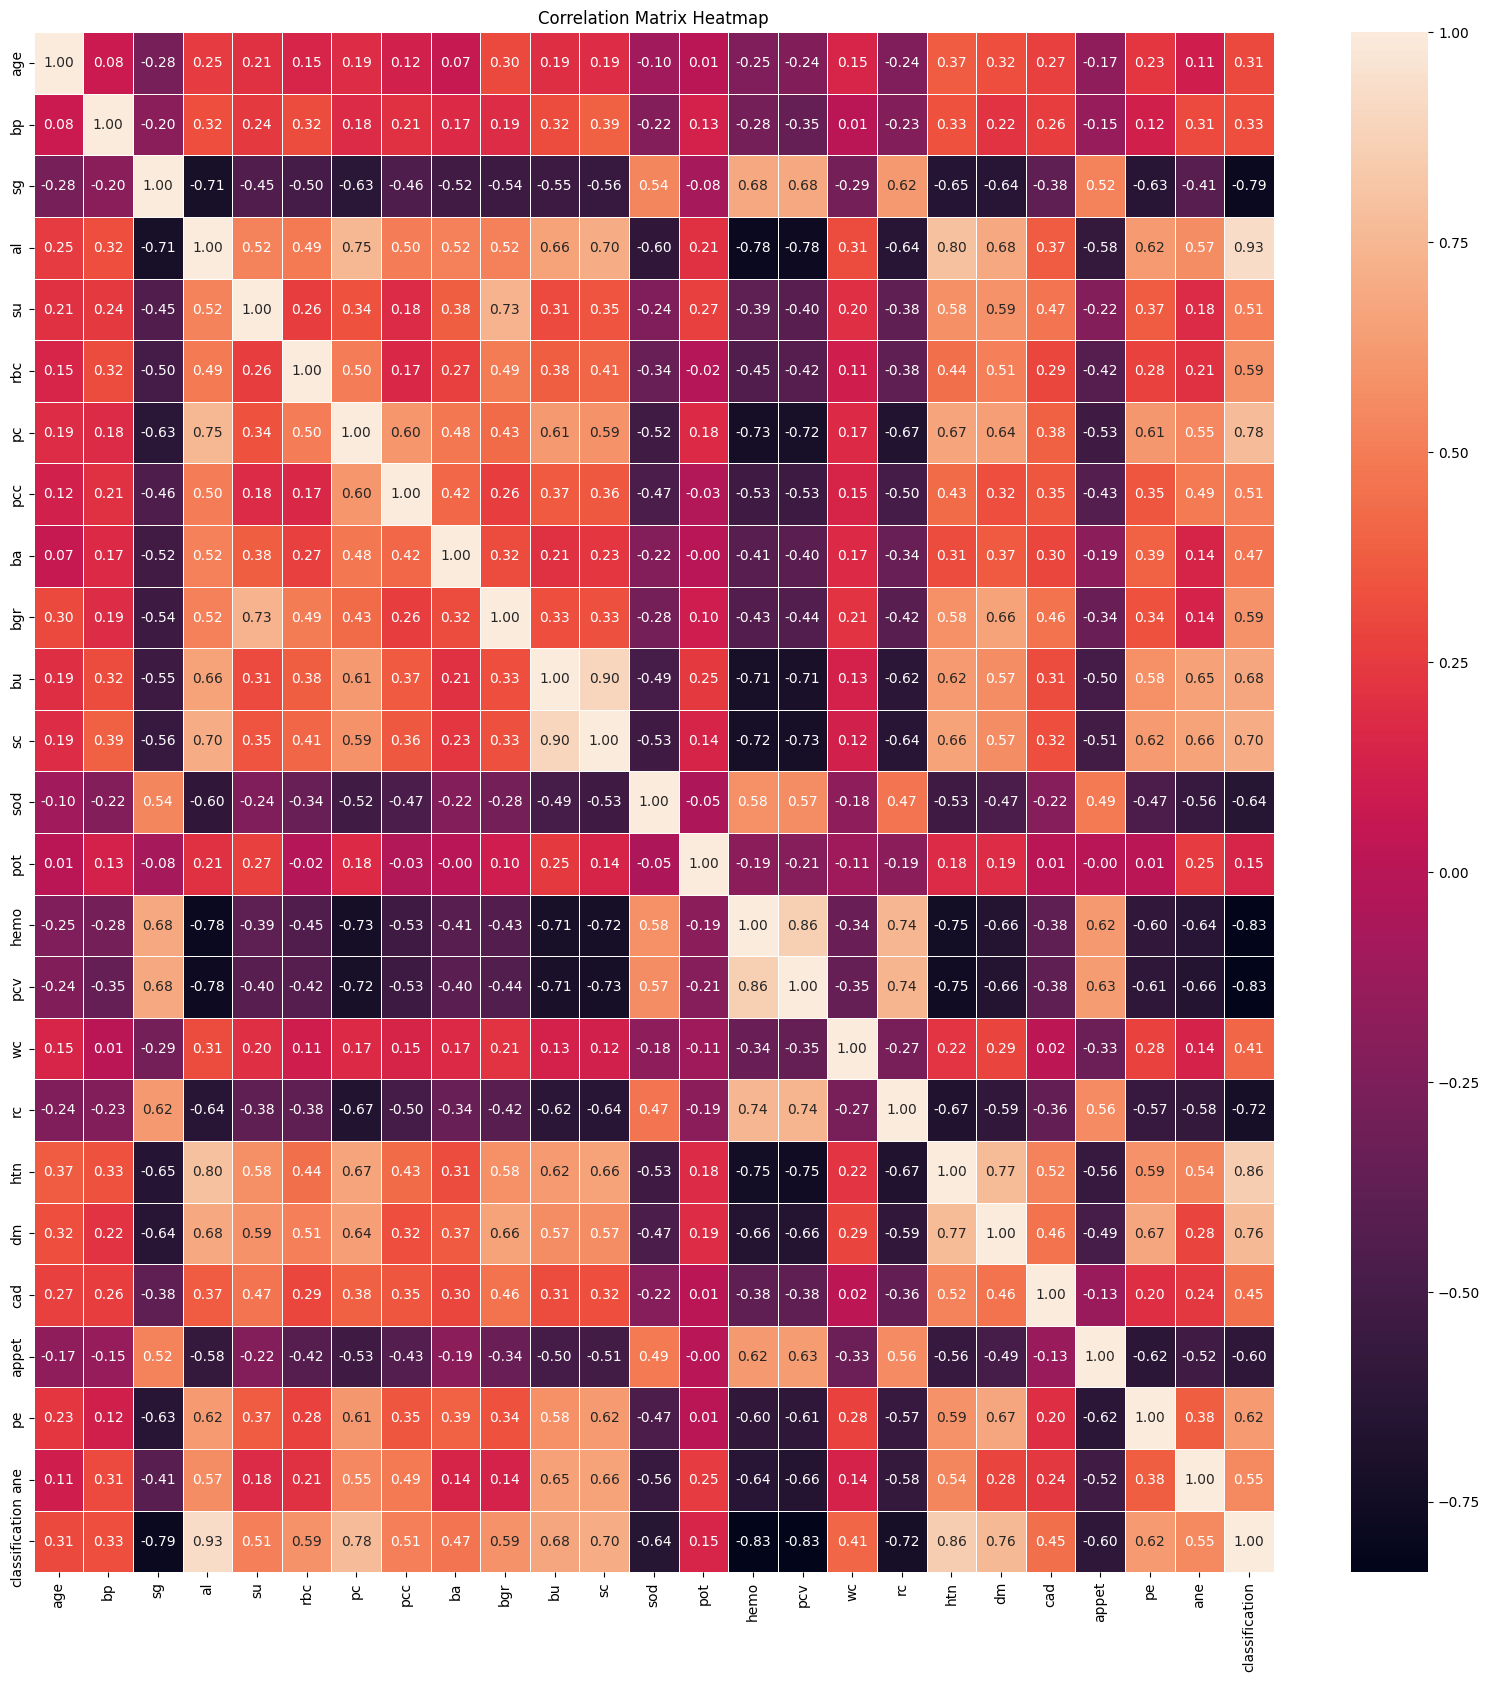

<Figure size 1500x1000 with 0 Axes>

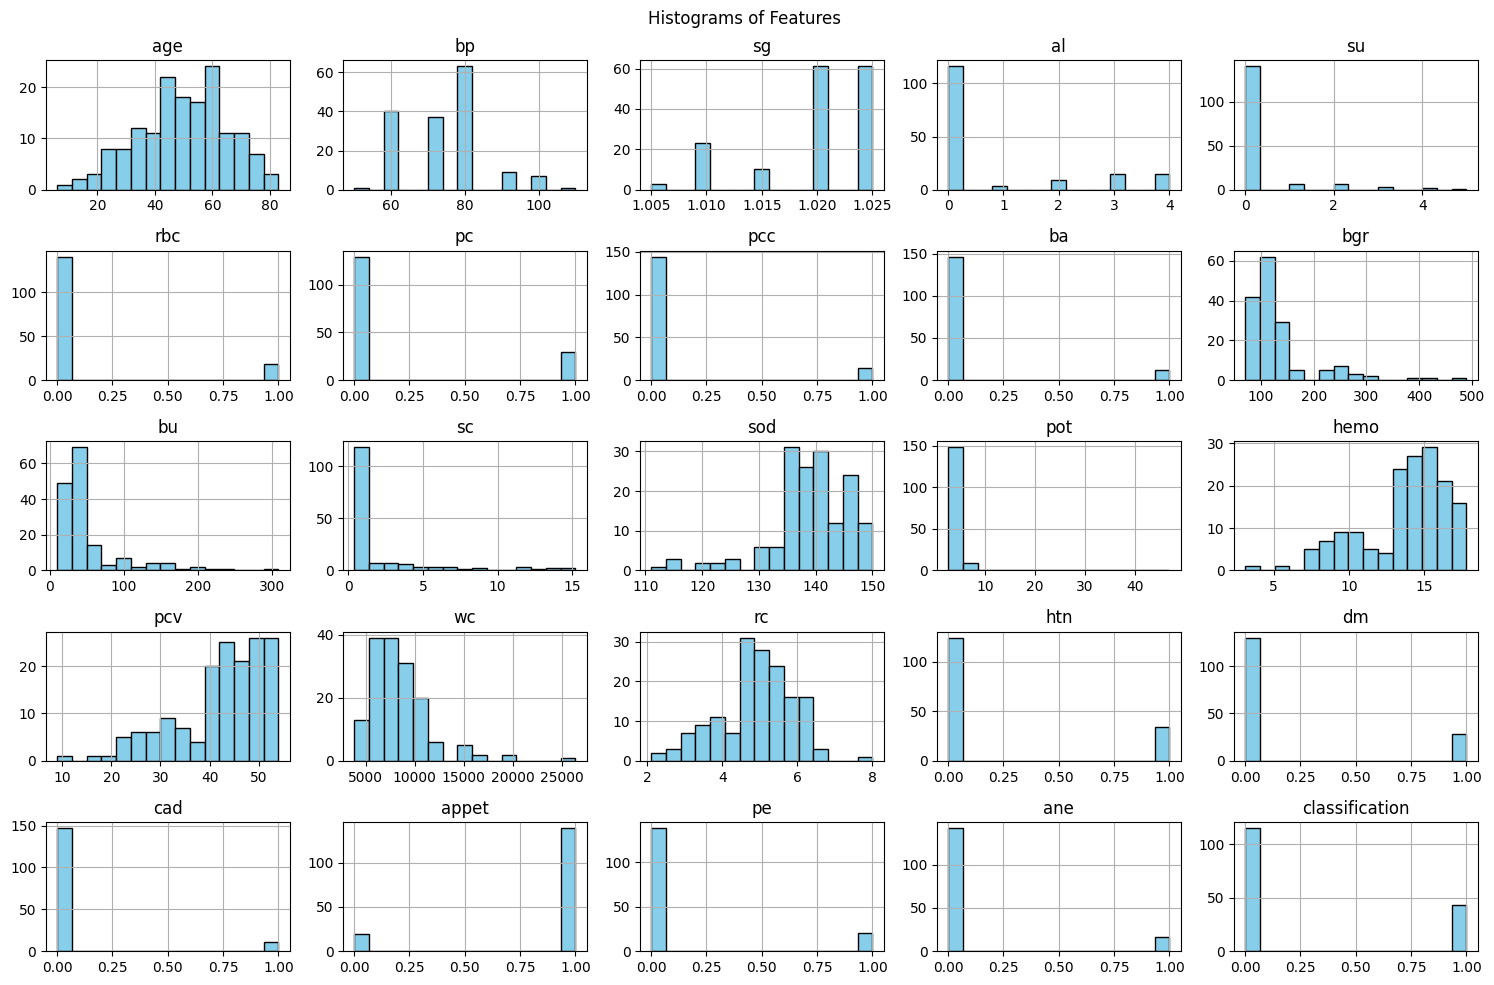

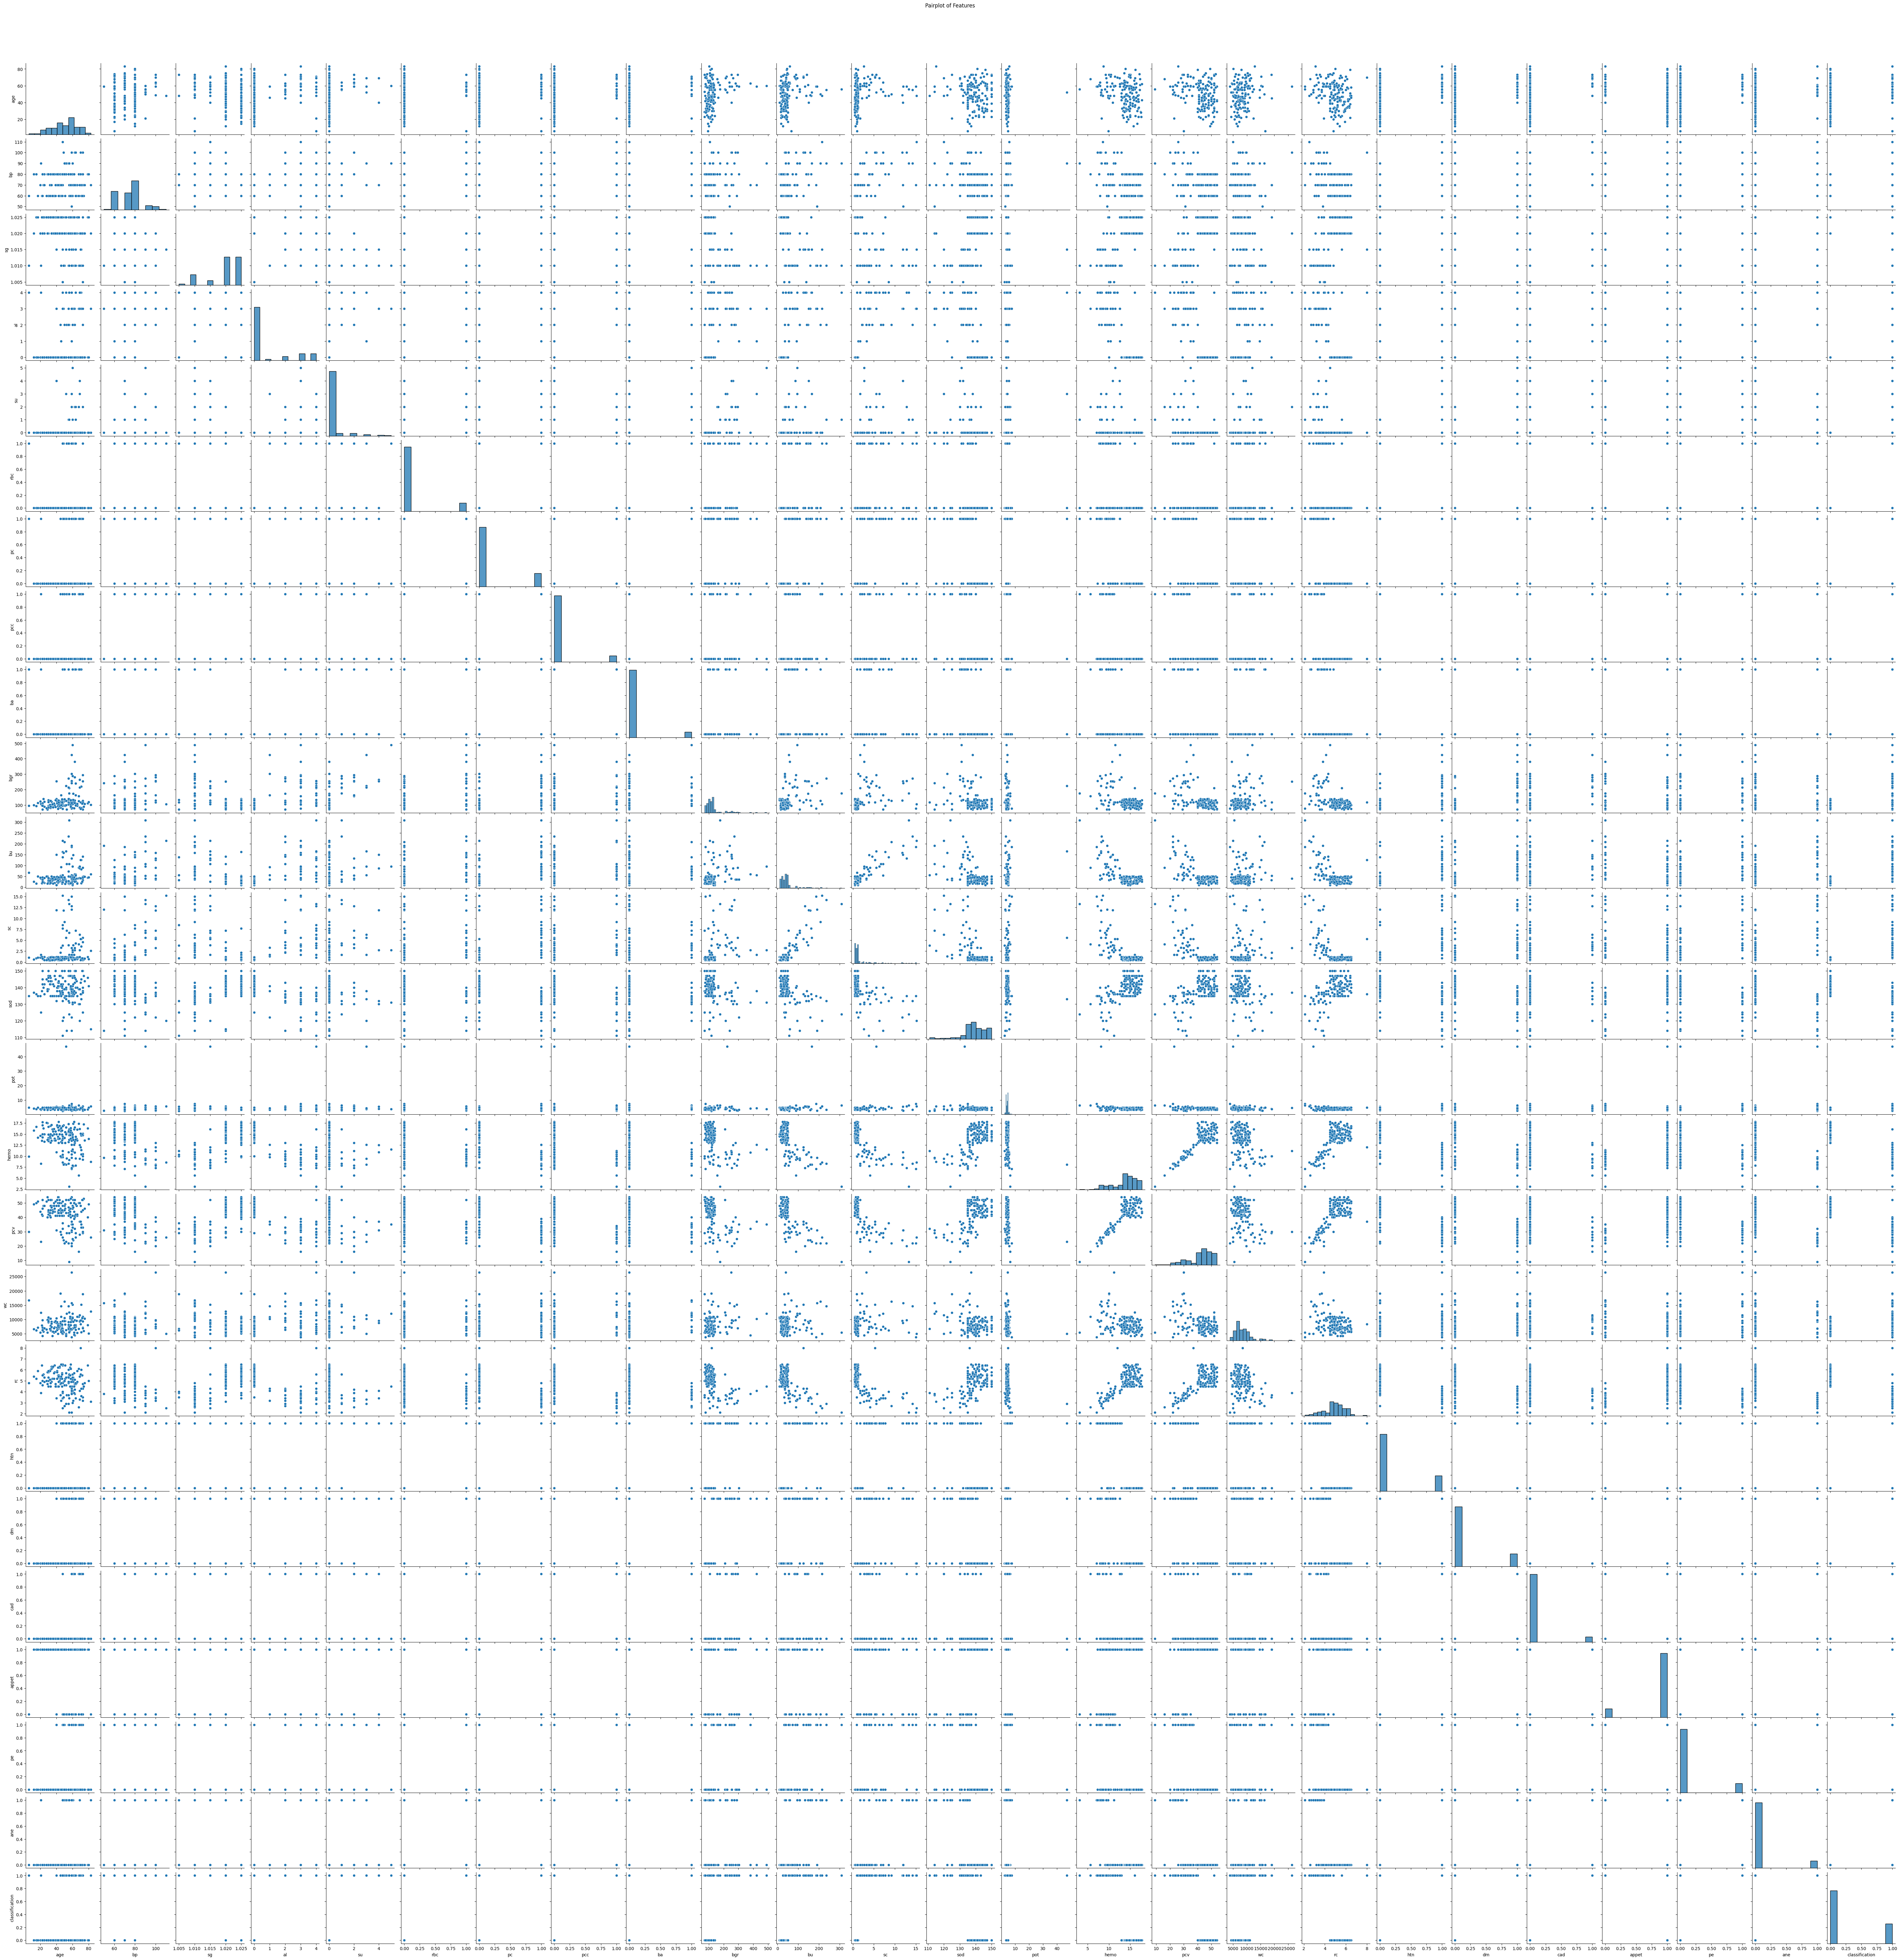

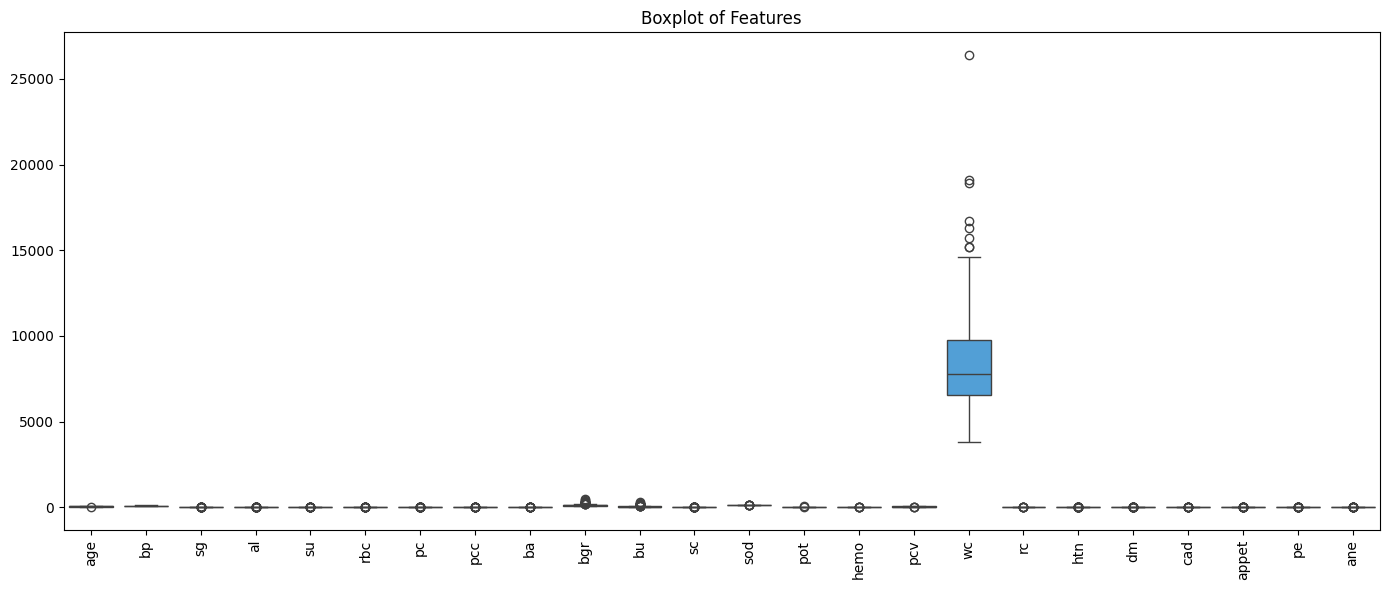

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


plt.figure(figsize=(15, 10))
df.hist(bins=15, color='skyblue', edgecolor='black', figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.tight_layout()
plt.show()


sns.pairplot(df)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()


plt.figure(figsize=(14, 6))

sns.boxplot(data=df.drop(columns=['classification']))
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.tight_layout()
plt.show()


In [26]:
df.corr()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
age,1.000000,0.079712,-0.277303,0.253380,0.207711,0.147971,0.188907,0.124032,0.068353,0.301915,...,-0.235116,0.153132,-0.242235,0.372348,0.323957,0.269868,-0.170259,0.232327,0.105809,0.305119
bp,0.079712,1.000000,-0.198897,0.322507,0.243828,0.316670,0.179834,0.206507,0.174555,0.190113,...,-0.353504,0.008274,-0.228533,0.334951,0.218096,0.257709,-0.145047,0.117878,0.311097,0.326567
sg,-0.277303,-0.198897,1.000000,-0.712331,-0.448477,-0.500494,-0.630323,-0.460050,-0.516392,-0.544781,...,0.678472,-0.288930,0.619092,-0.648168,-0.639391,-0.379305,0.523944,-0.633622,-0.413252,-0.790102
al,0.253380,0.322507,-0.712331,1.000000,0.521448,0.489941,0.752956,0.503341,0.516104,0.518123,...,-0.775528,0.314574,-0.640099,0.796876,0.678582,0.374755,-0.578080,0.622268,0.569529,0.925816
su,0.207711,0.243828,-0.448477,0.521448,1.000000,0.256568,0.335901,0.177327,0.381929,0.730050,...,-0.404821,0.201000,-0.377726,0.577286,0.591010,0.466658,-0.220547,0.374128,0.179811,0.510615
rbc,0.147971,0.316670,-0.500494,0.489941,0.256568,1.000000,0.498959,0.168592,0.273177,0.493857,...,-0.422537,0.108857,-0.379378,0.442400,0.511777,0.293269,-0.418639,0.282868,0.209797,0.586391
pc,0.188907,0.179834,-0.630323,0.752956,0.335901,0.498959,1.000000,0.600092,0.481227,0.430646,...,-0.718042,0.169936,-0.667113,0.666767,0.636288,0.384223,-0.528435,0.606234,0.545380,0.775388
pcc,0.124032,0.206507,-0.460050,0.503341,0.177327,0.168592,0.600092,1.000000,0.415033,0.257768,...,-0.534564,0.146742,-0.499401,0.432876,0.321900,0.352255,-0.432515,0.350171,0.485941,0.509915
ba,0.068353,0.174555,-0.516392,0.516104,0.381929,0.273177,0.481227,0.415033,1.000000,0.318095,...,-0.397500,0.170071,-0.343299,0.314961,0.367477,0.297063,-0.187815,0.393819,0.141344,0.468845
bgr,0.301915,0.190113,-0.544781,0.518123,0.730050,0.493857,0.430646,0.257768,0.318095,1.000000,...,-0.443818,0.212093,-0.418085,0.579407,0.663012,0.459164,-0.338924,0.336141,0.139854,0.591217


In [27]:
X = df.drop(['classification', 'sg', 'appet', 'rc', 'pcv', 'hemo', 'sod'], axis = 1)
y = df['classification']

In [28]:
X.columns

Index(['age', 'bp', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'pot', 'wc', 'htn', 'dm', 'cad', 'pe', 'ane'],
      dtype='object')

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=10, n_informative=5, n_redundant=2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]

print("Kidney:")
print("Random Forest Model Metrics:")
print("Accuracy: ", round(accuracy_score(y_test, rf_pred) * 100, 2))
print("Precision:", round(precision_score(y_test, rf_pred) * 100, 2))
print("Recall:   ", round(recall_score(y_test, rf_pred) * 100, 2))
print("F1 Score: ", round(f1_score(y_test, rf_pred) * 100, 2))
print("ROC-AUC:  ", round(roc_auc_score(y_test, rf_prob) * 100, 2))
print()


log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_prob = log_model.predict_proba(X_test)[:, 1]

print("Logistic Regression Model Metrics:")
print("Accuracy: ", round(accuracy_score(y_test, log_pred) * 100, 2))
print("Precision:", round(precision_score(y_test, log_pred) * 100, 2))
print("Recall:   ", round(recall_score(y_test, log_pred) * 100, 2))
print("F1 Score: ", round(f1_score(y_test, log_pred) * 100, 2))
print("ROC-AUC:  ", round(roc_auc_score(y_test, log_prob) * 100, 2))
print()


dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_prob = dt_model.predict_proba(X_test)[:, 1]

print("Decision Tree Model Metrics:")
print("Accuracy: ", round(accuracy_score(y_test, dt_pred) * 100, 2))
print("Precision:", round(precision_score(y_test, dt_pred) * 100, 2))
print("Recall:   ", round(recall_score(y_test, dt_pred) * 100, 2))
print("F1 Score: ", round(f1_score(y_test, dt_pred) * 100, 2))
print("ROC-AUC:  ", round(roc_auc_score(y_test, dt_prob) * 100, 2))


Kidney:
Random Forest Model Metrics:
Accuracy:  90.0
Precision: 90.0
Recall:    90.0
F1 Score:  90.0
ROC-AUC:   96.62

Logistic Regression Model Metrics:
Accuracy:  80.0
Precision: 77.27
Recall:    85.0
F1 Score:  80.95
ROC-AUC:   81.0

Decision Tree Model Metrics:
Accuracy:  82.5
Precision: 80.95
Recall:    85.0
F1 Score:  82.93
ROC-AUC:   82.5


In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model = RandomForestClassifier(
    n_estimators=20,
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=20, random_state=42)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [35]:
confusion_matrix(y_test, model.predict(X_test))

array([[23,  0],
       [ 1,  8]])


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.89      0.94         9

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32



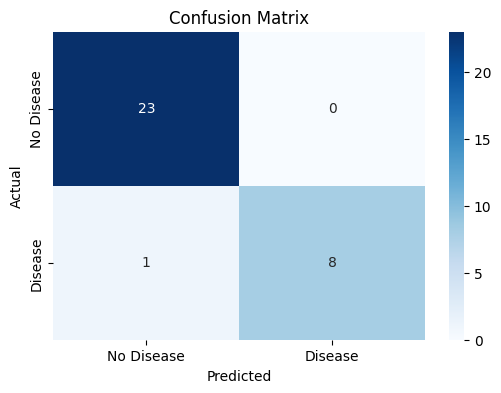

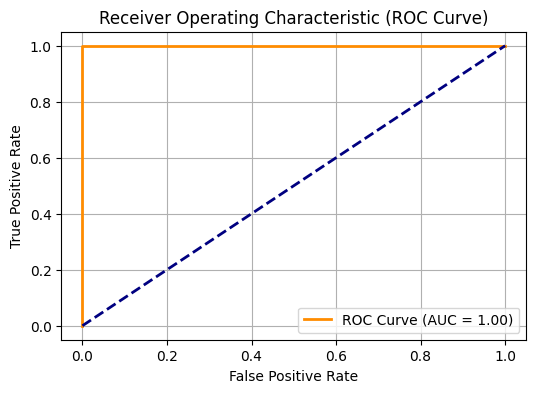

In [36]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns


y_pred = model.predict(X_test)


if hasattr(model, "predict_proba"):
    y_proba = model.predict_proba(X_test)[:, 1]
else:
    y_proba = None


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


if y_proba is not None:
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC Curve)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


In [37]:
import joblib
filename = 'Kidney.sav'
joblib.dump(model, filename)


['Kidney.sav']